## Weather Prediction System based on Rain
                                                                               - Saptaswa Basu

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
rainfall = pd.read_csv("weatherAUS.csv")

In [3]:
rainfall.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
rainfall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
rainfall.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [6]:
rainfall.isna().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [7]:
rainfall['Location'].dtype 

dtype('O')

In [8]:
# Identify the diff types of data features and segregate them

numerical_feature = [feature for feature in rainfall.columns if rainfall[feature].dtype != 'O']
catagorical_feature = [feature for feature in rainfall.columns if feature not in numerical_feature]
continuous_feature = [feature for feature in numerical_feature if len(rainfall[feature].unique()) > 25]
# Discrete : In a numeric column whose unique feature are very less(<< 25 taken here)
discrete_feature = [feature for feature in numerical_feature if feature not in continuous_feature]

In [9]:
print("Total no. of Numerical features are: {}".format(len(numerical_feature)))
print("Total no. of Catagorical features are: {}".format(len(catagorical_feature)))
print("Total no. of Continuous features are: {}".format(len(continuous_feature)))
print("Total no. of Discrete features are: {}".format(len(discrete_feature)))

Total no. of Numerical features are: 16
Total no. of Catagorical features are: 7
Total no. of Continuous features are: 14
Total no. of Discrete features are: 2


In [10]:
# Replace the null values in the numerical columns with the median value of features

for feature in numerical_feature:
    if(rainfall[feature].isna().sum()) > 0:
        rainfall[feature] = rainfall[feature].fillna(rainfall[feature].median())

In [11]:
rainfall[numerical_feature].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [12]:
rainfall[catagorical_feature].isna().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

###### The values number for `RainToday` and `RainTomorrow` should be same as here RainTomorrow is the target value and RainToday is one of the major factor which has the highest corr b/w them.

In [13]:
rainfall.dropna(subset = ["RainToday","RainTomorrow"], inplace = True)

In [14]:
rainfall.isna().sum()

Date                0
Location            0
MinTemp             0
MaxTemp             0
Rainfall            0
Evaporation         0
Sunshine            0
WindGustDir      9163
WindGustSpeed       0
WindDir9am       9660
WindDir3pm       3670
WindSpeed9am        0
WindSpeed3pm        0
Humidity9am         0
Humidity3pm         0
Pressure9am         0
Pressure3pm         0
Cloud9am            0
Cloud3pm            0
Temp9am             0
Temp3pm             0
RainToday           0
RainTomorrow        0
dtype: int64

###### Here all the missing data for `numerical columns` is already fixed and also there is no missing values for our `target value`.

###### Only there are some missing value still present in case of `catagorical values`, those values we will deal in near future. 

In [15]:
rainfall.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


#### Understanding the Behaviour of Continuous features with the help of distribution plot :

In [16]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 10
matplotlib.rcParams['figure.figsize'] = (5,2)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


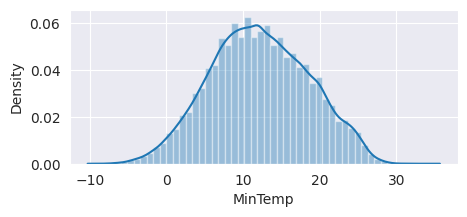

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


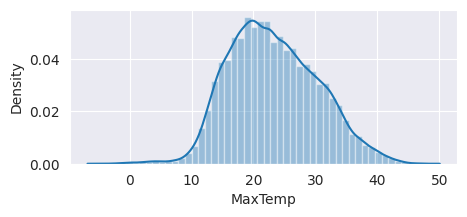

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


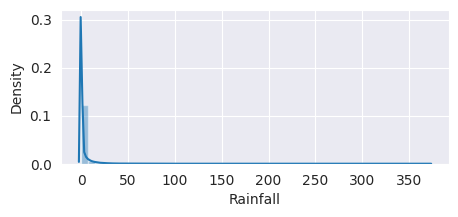

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


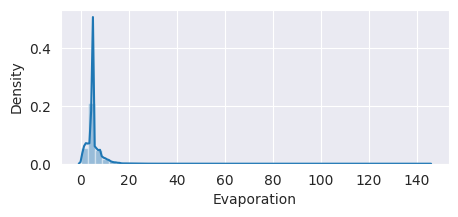

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


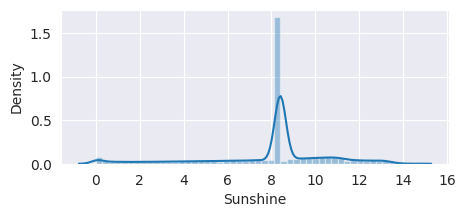

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


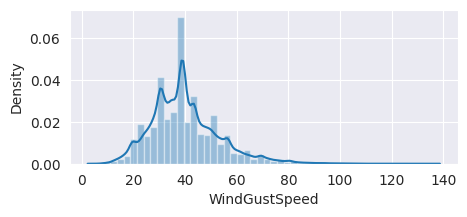

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


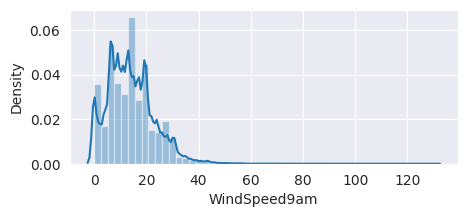

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


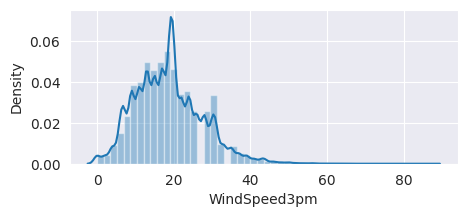

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


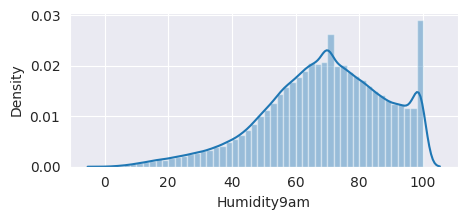

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


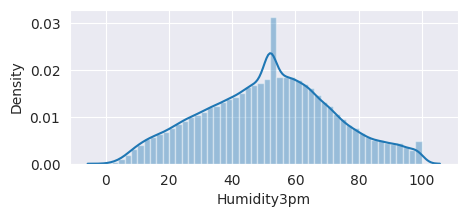

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


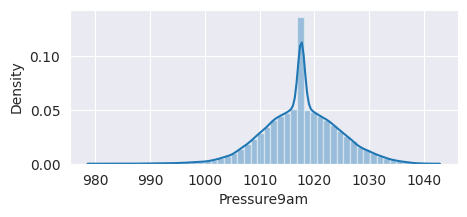

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


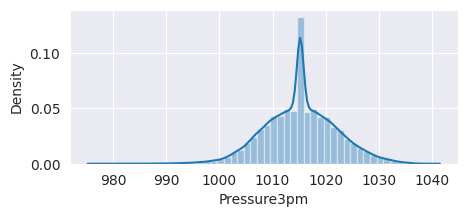

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


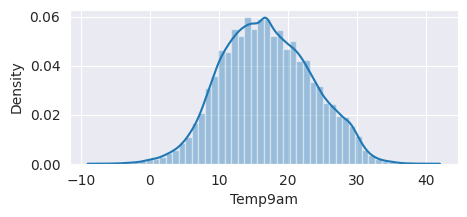

/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


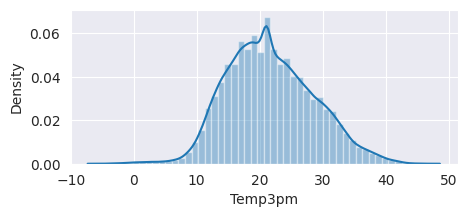

In [17]:
for feature in continuous_feature:
    data = rainfall.copy()
    sns.distplot(rainfall[feature])
    plt.show()

##### From these graphs it can be seen that most of the features are normally distributed. If the graphs were not normally distributed we need to do that with the help of `Standard scaler` method.

### Preprocessing of Catagorical Data

catagorical_feature

Among all the other catagorical features only `RainToday` and `RainTomorrow` has binary values as output , so to tackel these 2 first we need to use `get_dummies` function.

To convert binary catagorical data into numerical data, we use `get_dummies` function from pandas..........

In [18]:
rainfall['RainToday'] = pd.get_dummies(rainfall['RainToday'], drop_first = True)
rainfall['RainTomorrow'] = pd.get_dummies(rainfall['RainTomorrow'], drop_first = True)

In [19]:
rainfall.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,4.8,8.4,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,Albury,7.4,25.1,0.0,4.8,8.4,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,Albury,12.9,25.7,0.0,4.8,8.4,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,Albury,9.2,28.0,0.0,4.8,8.4,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,Albury,17.5,32.3,1.0,4.8,8.4,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


#### Transform the reamaining catagorical data with Lebel-Encoding

In [20]:
from sklearn import preprocessing
labelencoder = preprocessing.LabelEncoder()

rainfall['Location'] = labelencoder.fit_transform(rainfall['Location'])
rainfall['WindGustDir'] = labelencoder.fit_transform(rainfall['WindGustDir'])
rainfall['WindDir9am'] = labelencoder.fit_transform(rainfall['WindDir9am'])
rainfall['WindDir3pm'] = labelencoder.fit_transform(rainfall['WindDir3pm'])

In [21]:
rainfall.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0


In [22]:
rainfall.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
dtype: int64

After Handling the null values, now all the data-points are ready to work with.

### Handling Date-Time columns

In [23]:
rainfall["Date"] = pd.to_datetime(rainfall["Date"], format = "%Y-%m-%dT")

In [24]:
rainfall["Date_year"] = rainfall["Date"].dt.year
rainfall["Date_month"] = rainfall["Date"].dt.month
rainfall["Date_day"] = rainfall["Date"].dt.day

In [25]:
rainfall.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_year,Date_month,Date_day
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


We divided all the dates into separate columns, so that it become easy to work with.......

#### Data Cleaning is done ........

In [26]:
rainfall.to_csv("cleaned_data.csv", index = False)

#### Removing Outliers 

In [27]:
continuous_feature

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [28]:
# Check the outliers with the help of boxplots and then with the standard formula try to remove those outliers    

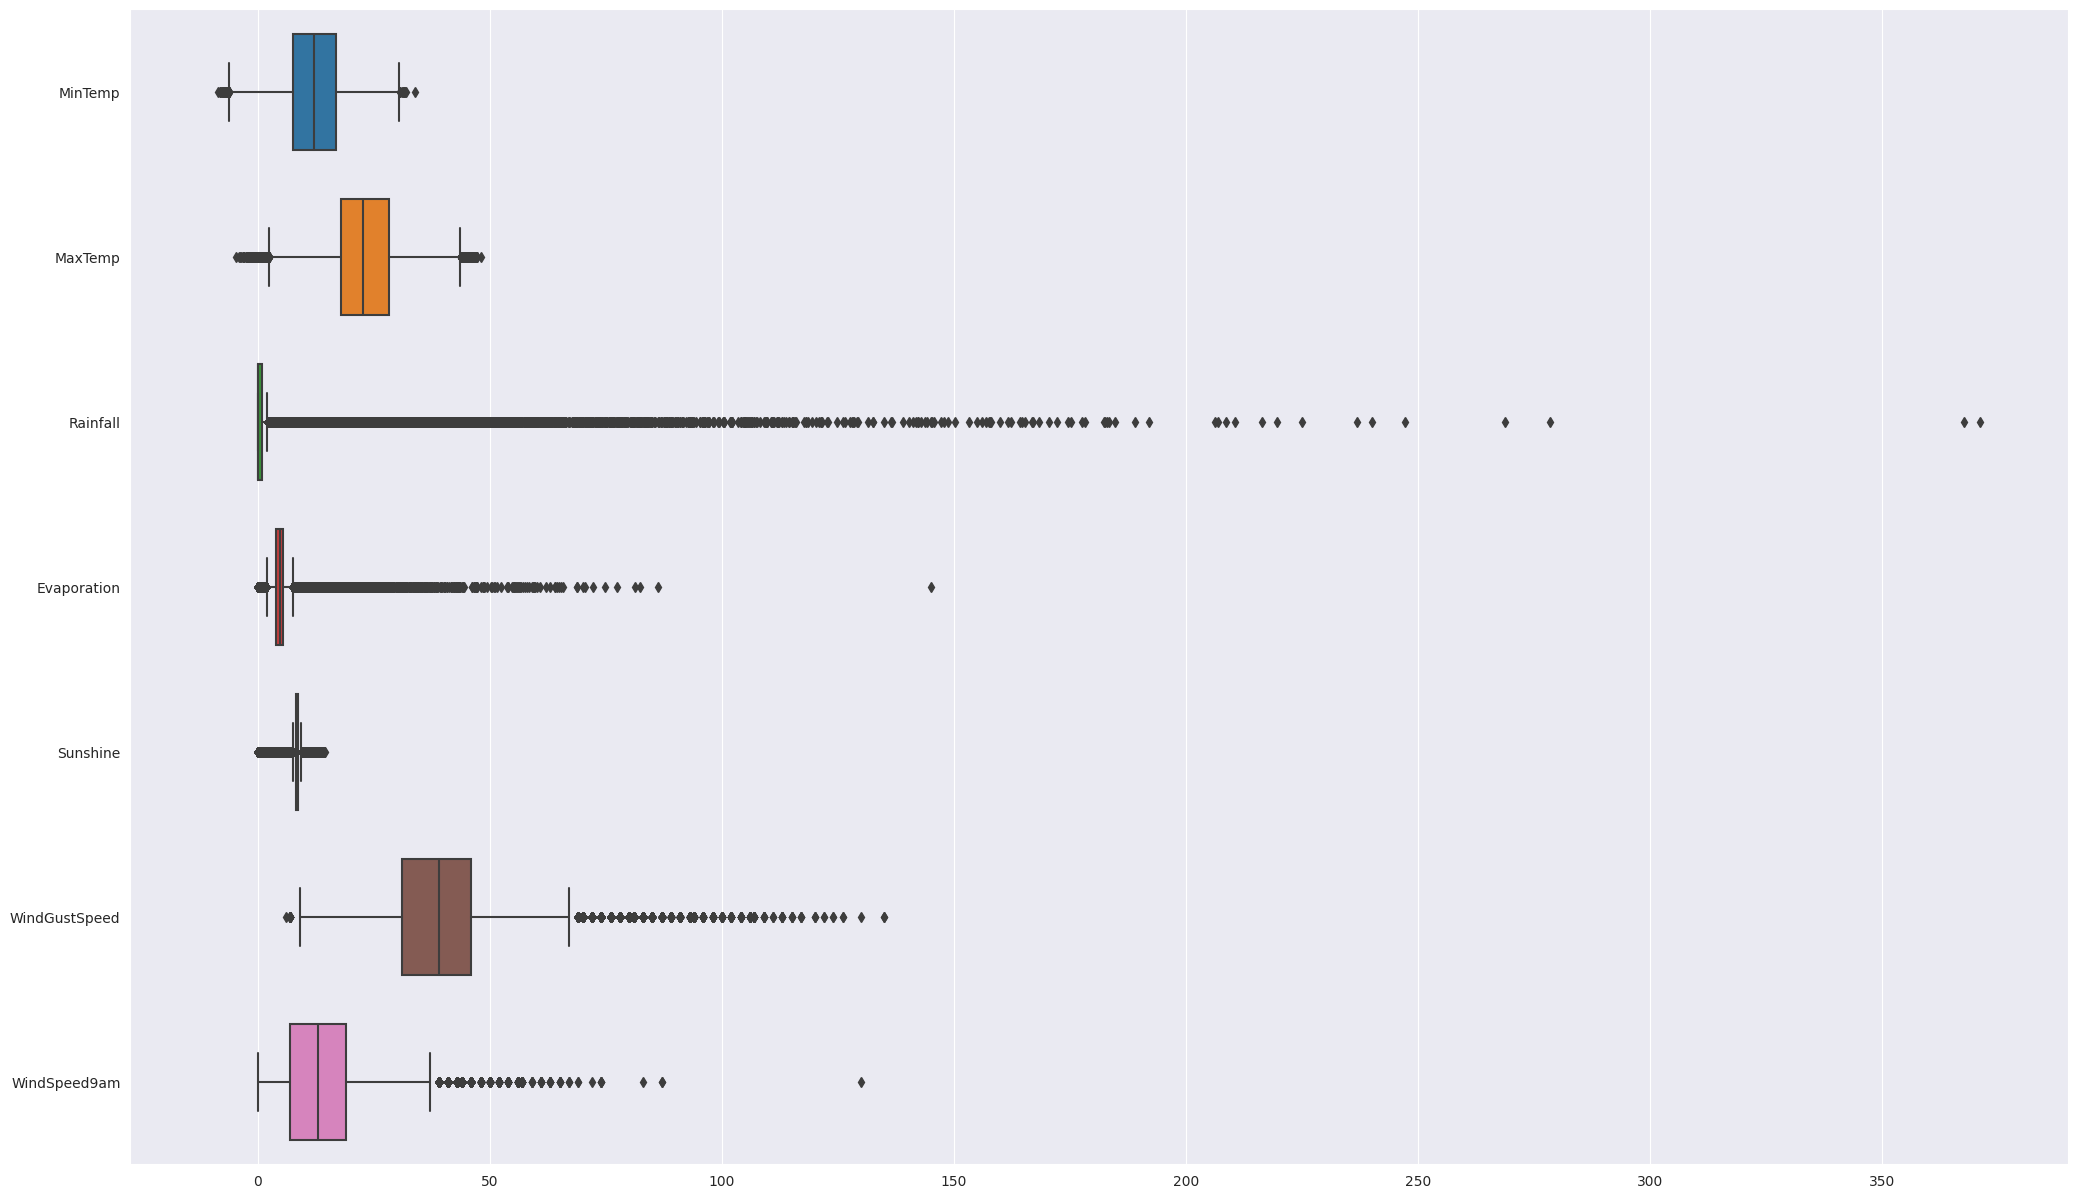

In [29]:
fig , axis = plt.subplots(figsize = (25,15))
g = sns.boxplot(data = rainfall[continuous_feature[0:7]], width = 0.7, orient = 'h')

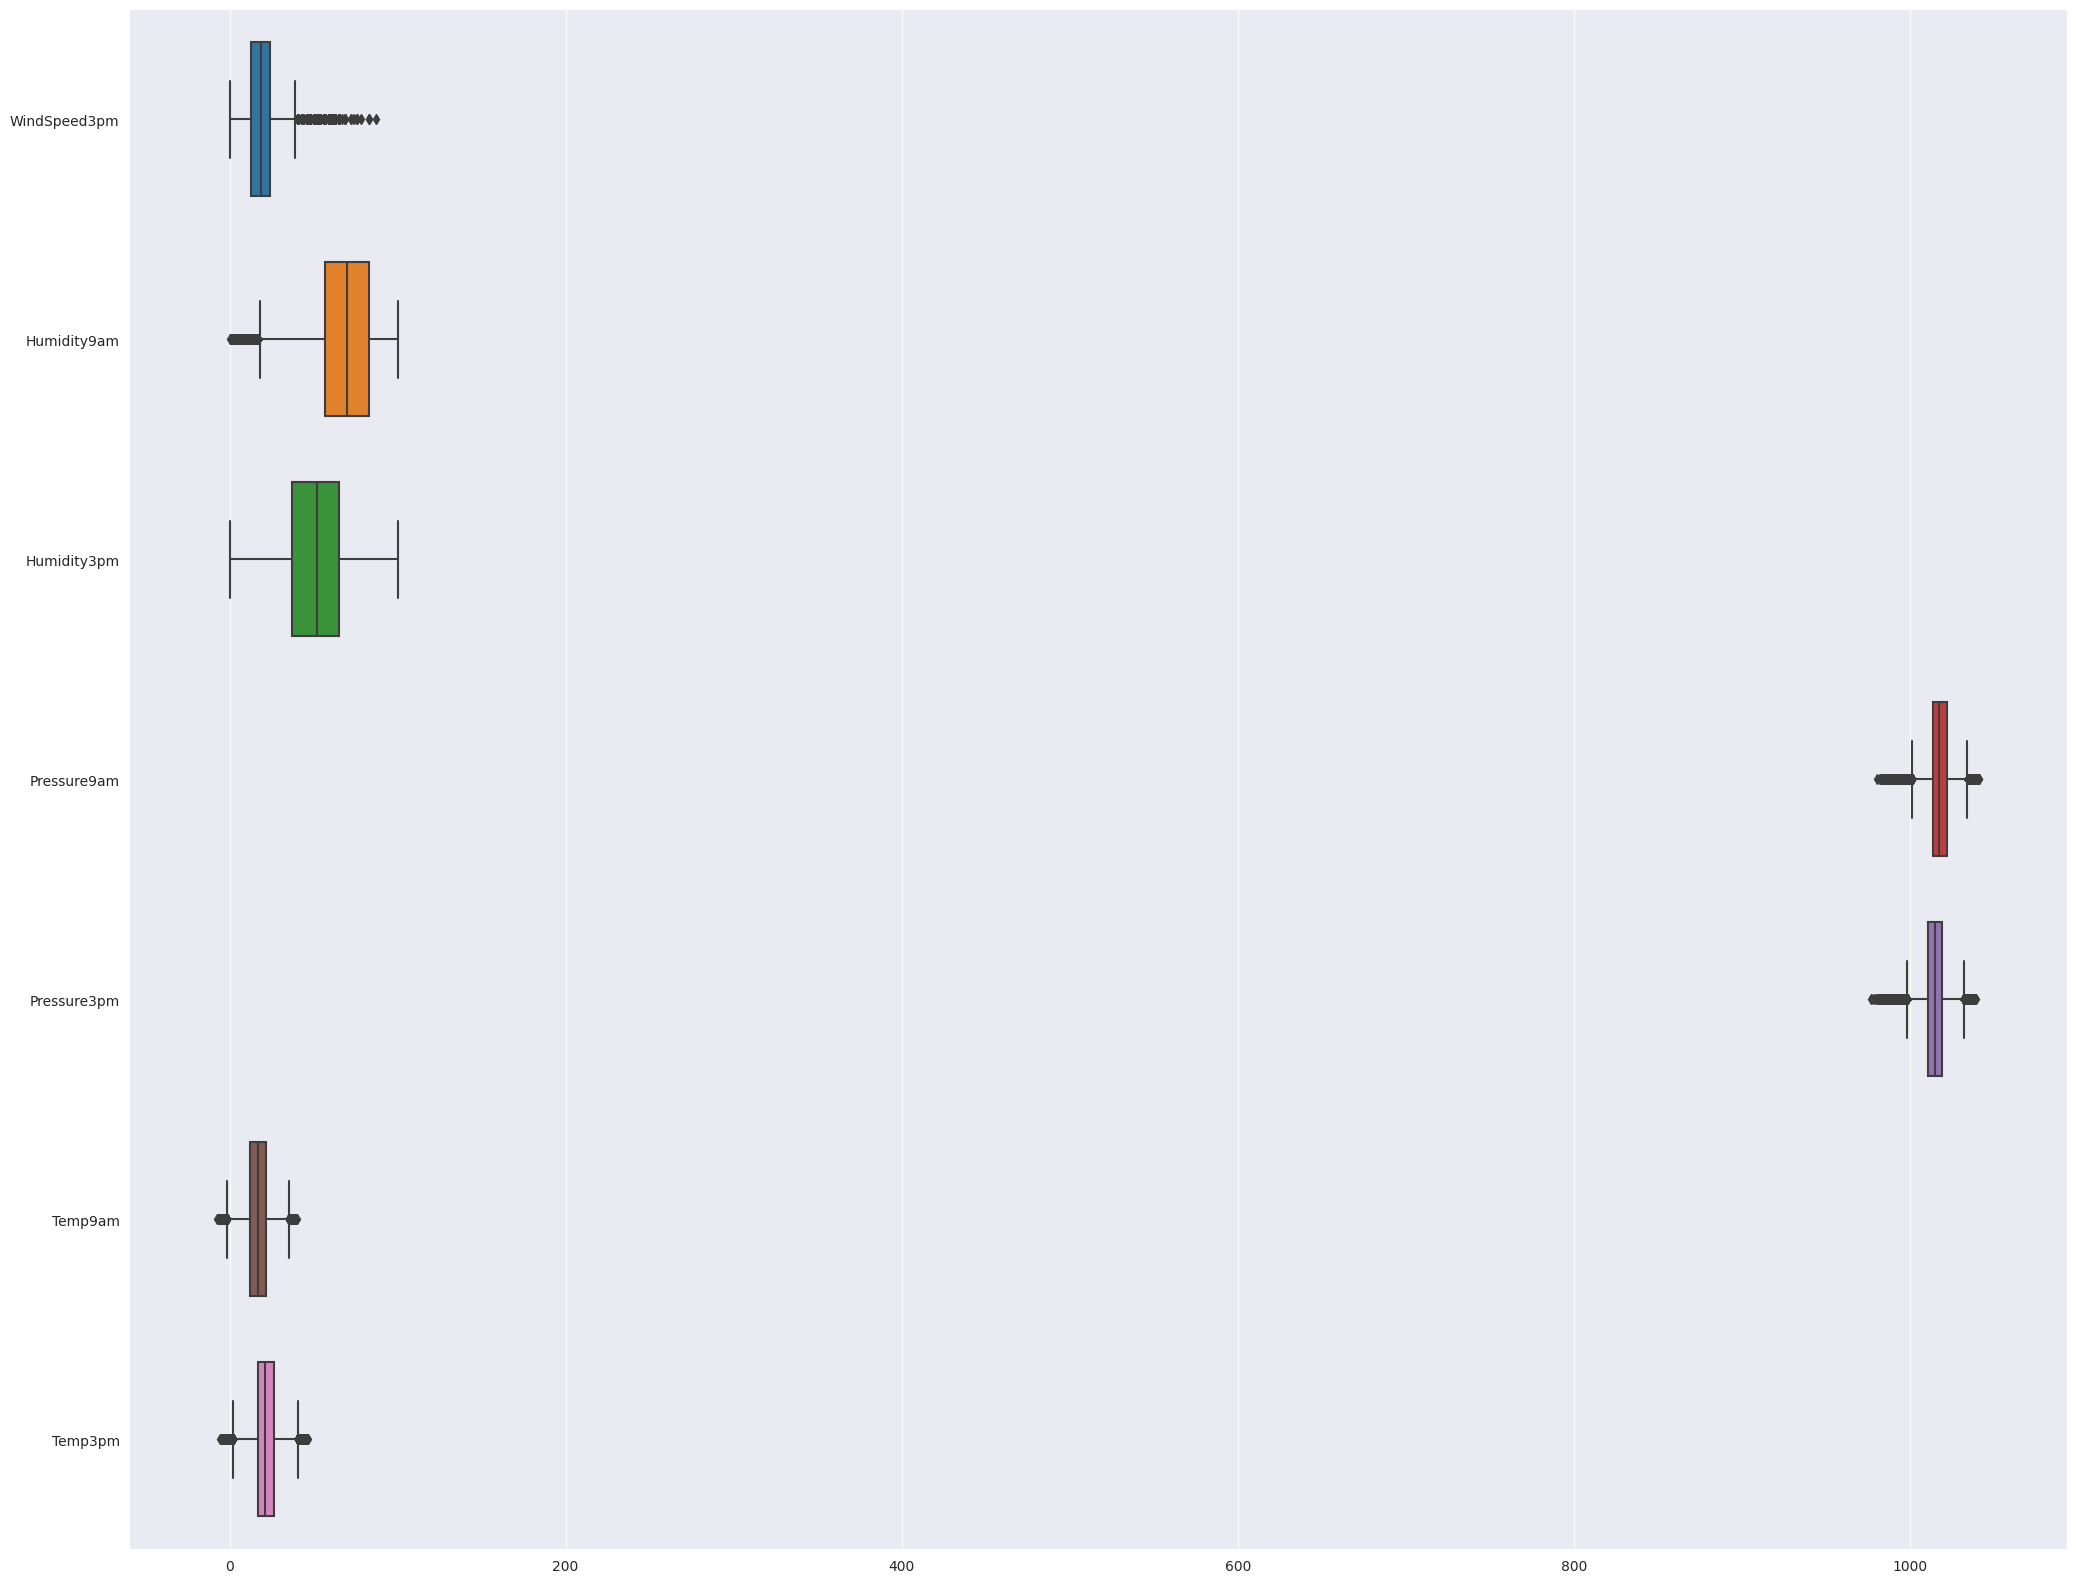

In [30]:
fig , axis = plt.subplots(figsize = (25,20))
g = sns.boxplot(data = rainfall[continuous_feature[7:]], width = 0.7, orient = 'h')

#### Below picture will help to clarify the concept of boxplots and its outliers and how we able to remove those outliers .........

<img src="boxplot.png">

In [31]:
def outliers(rainfall, variable):
    IQR = rainfall[variable].quantile(0.75) - rainfall[variable].quantile(0.25)
    lower_bridge = rainfall[variable].quantile(0.25) - (IQR*1.25)
    upper_bridge = rainfall[variable].quantile(0.75) + (IQR*1.25)
    
    print(lower_bridge, upper_bridge)
    
    rainfall.loc[rainfall[variable] >= upper_bridge,variable] = upper_bridge
    rainfall.loc[rainfall[variable] <= lower_bridge,variable] = lower_bridge

In [32]:
for feature in continuous_feature:
    outliers(rainfall,str(feature))

-3.900000000000002 28.300000000000004
5.024999999999999 41.075
-1.0 1.8
2.2499999999999996 7.15
7.574999999999999 9.325
12.25 64.75
-8.0 34.0
-0.75 37.75
24.5 115.5
2.0 100.0
1003.125 1032.175
1000.5 1029.8999999999999
0.8000000000000007 33.0
4.6999999999999975 38.300000000000004


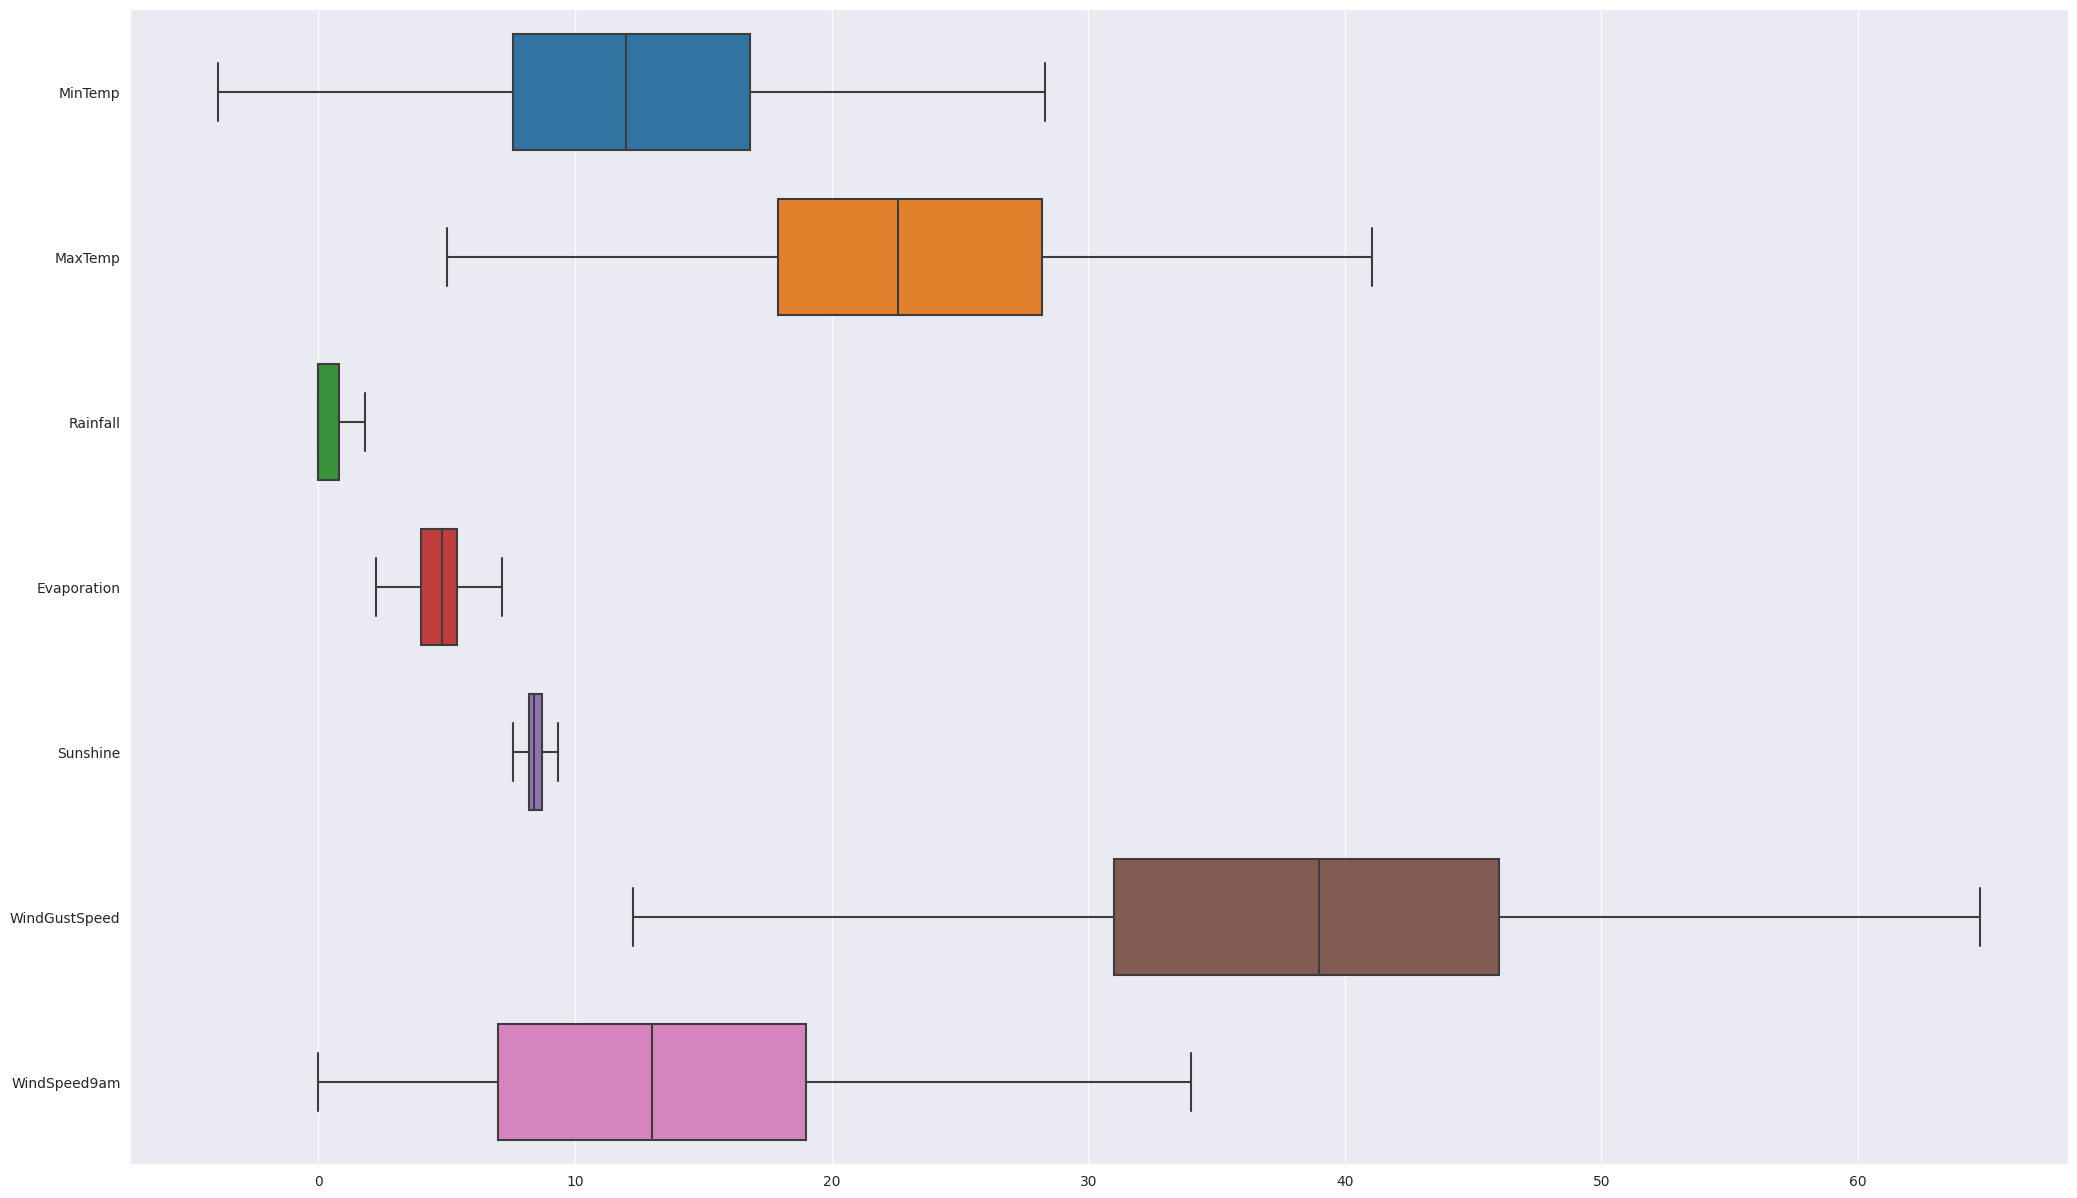

In [33]:
fig , axis = plt.subplots(figsize = (25,15))
g = sns.boxplot(data = rainfall[continuous_feature[0:7]], width = 0.7, orient = 'h')

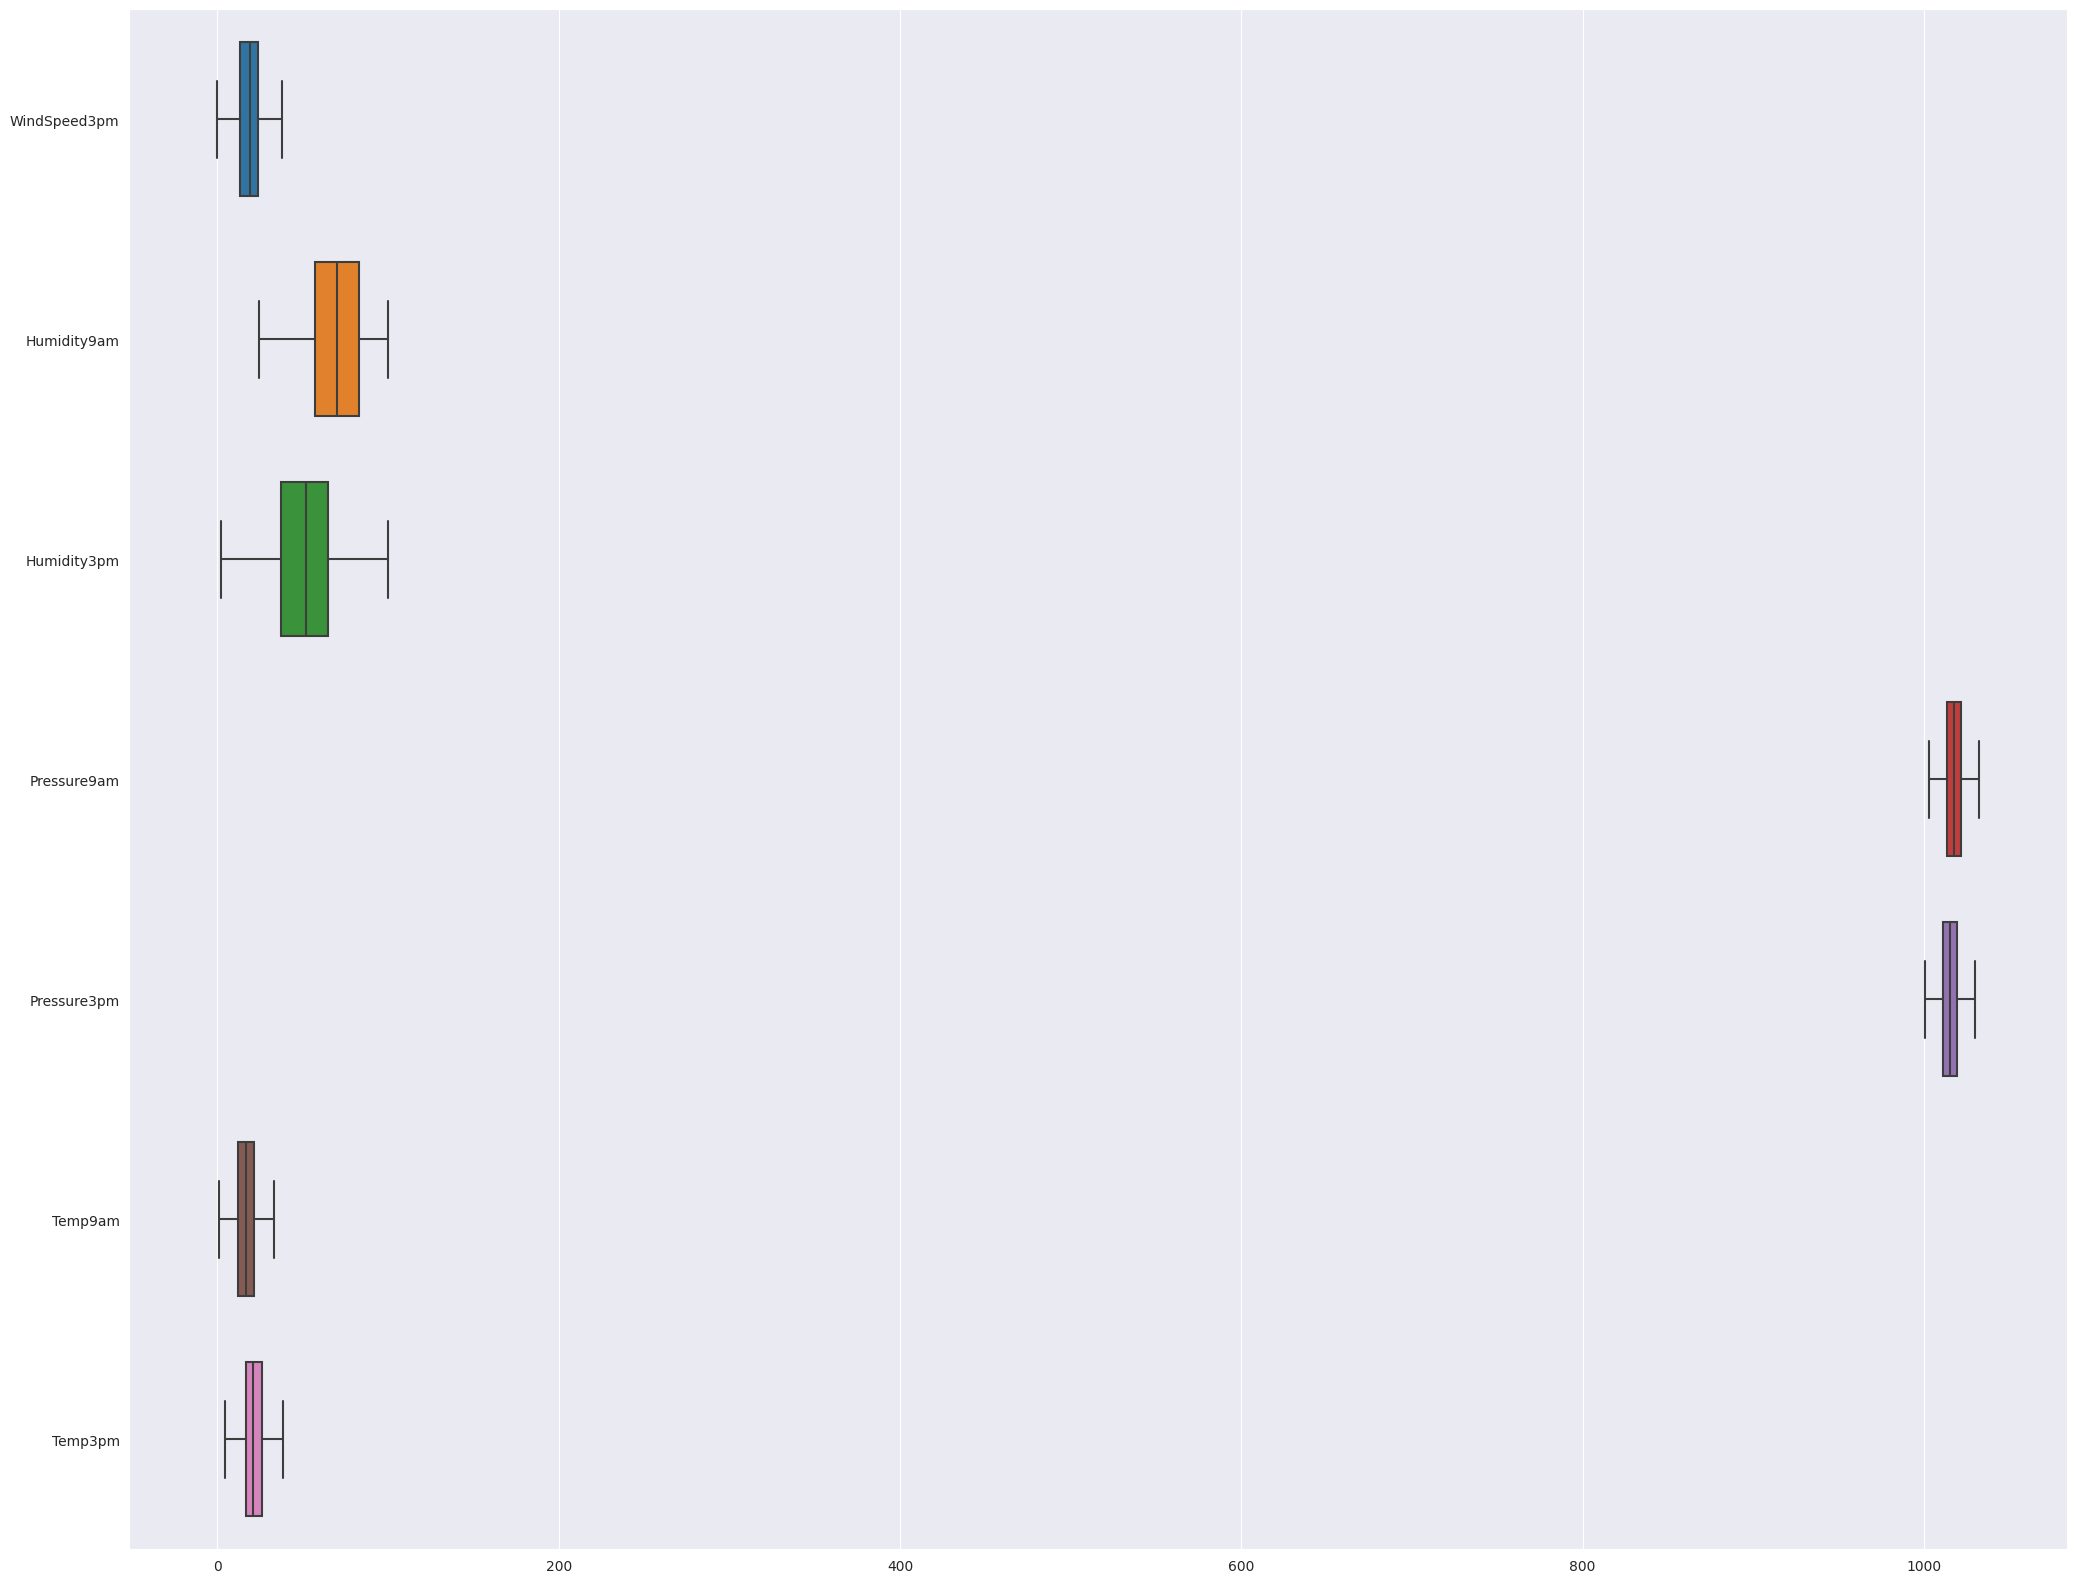

In [34]:
fig , axis = plt.subplots(figsize = (25,20))
g = sns.boxplot(data = rainfall[continuous_feature[7:]], width = 0.7, orient = 'h')

In [35]:
rainfall.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Date_year,Date_month,Date_day
0,2008-12-01,2,13.4,22.9,0.6,4.8,8.4,13,44.0,13,...,1007.1,8.0,5.0,16.9,21.8,0,0,2008,12,1
1,2008-12-02,2,7.4,25.1,0.0,4.8,8.4,14,44.0,6,...,1007.8,5.0,5.0,17.2,24.3,0,0,2008,12,2
2,2008-12-03,2,12.9,25.7,0.0,4.8,8.4,15,46.0,13,...,1008.7,5.0,2.0,21.0,23.2,0,0,2008,12,3
3,2008-12-04,2,9.2,28.0,0.0,4.8,8.4,4,24.0,9,...,1012.8,5.0,5.0,18.1,26.5,0,0,2008,12,4
4,2008-12-05,2,17.5,32.3,1.0,4.8,8.4,13,41.0,1,...,1006.0,7.0,8.0,17.8,29.7,0,0,2008,12,5


#### Correlation Matrix

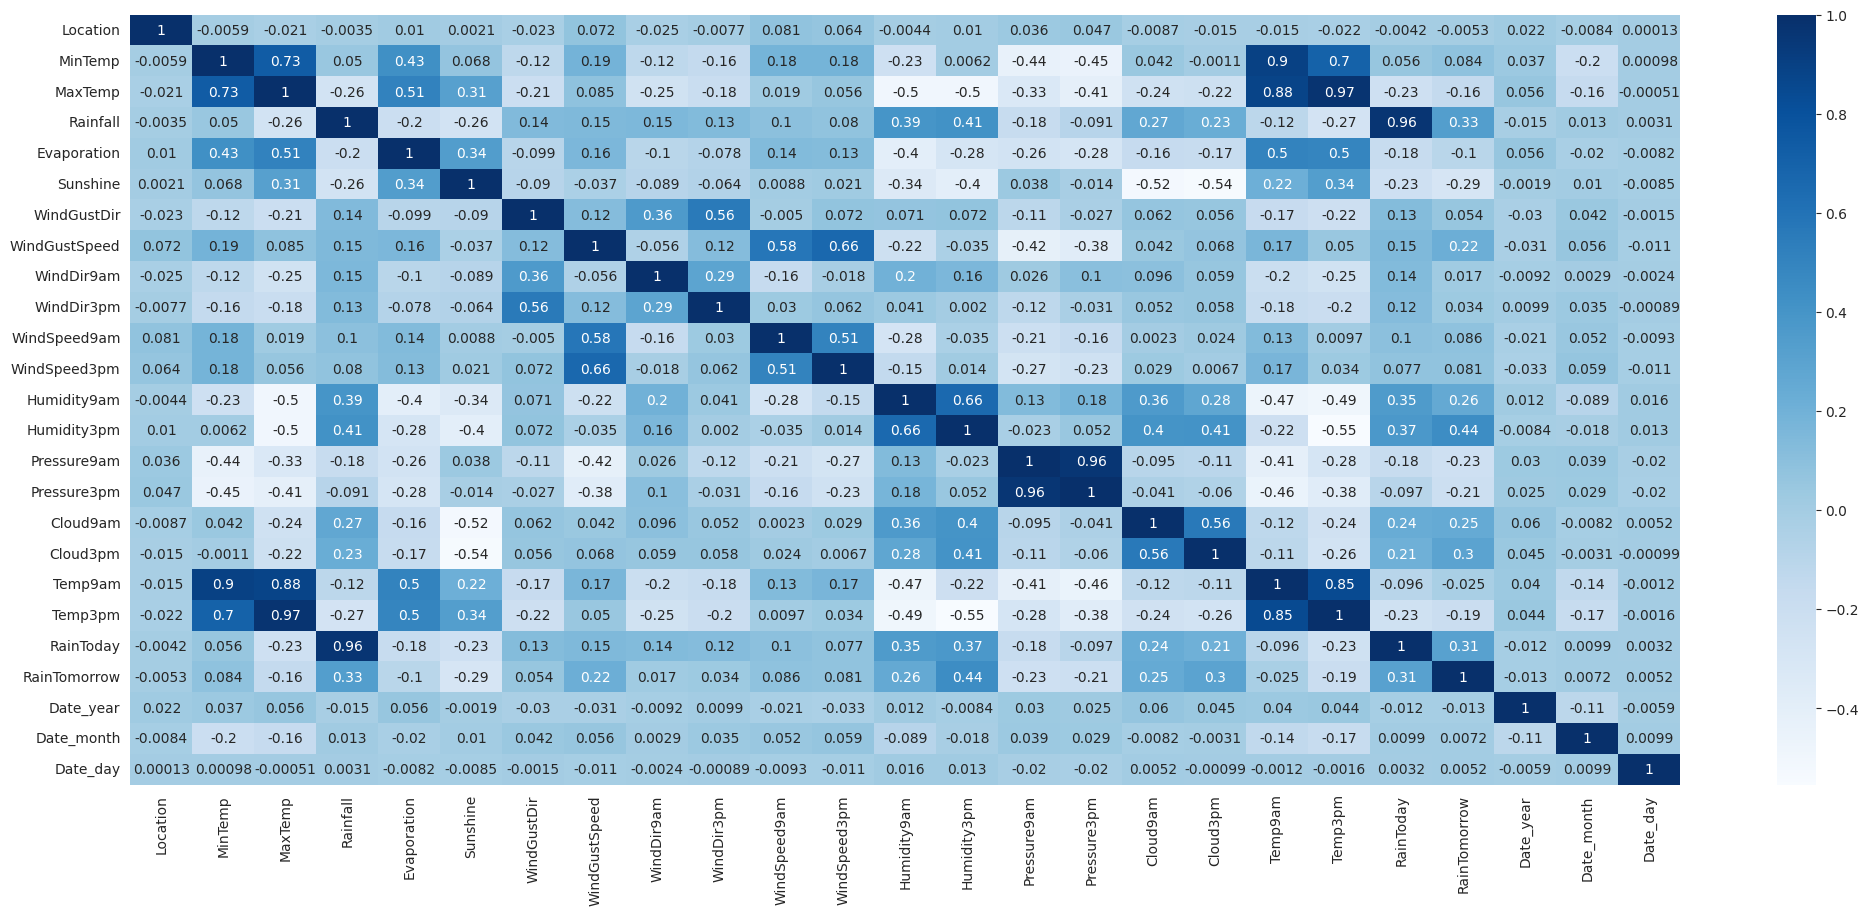

In [36]:
corr_matrix = rainfall.corr()
plt.figure(figsize = (25,10))
g = sns.heatmap(corr_matrix, annot = True, cmap = 'Blues');

#### Pre-Processed Data

In [37]:
rainfall.to_csv("preprocessed_data.csv", index = False)

#### Standerdization

In [38]:
# Input and Target values
inputs = rainfall.drop(['Date','RainTomorrow'], axis = 1)   
target = rainfall['RainTomorrow']      

- Standard scaling makes the values of the attribute very closer to each other, all the value come into one perticular range, so it can work faster and more efficient way.
- To make the data normally distributed we generally use Standard scaling technique , but as the data here is already normally distributed so it won't make much difference.

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

- Scaling across an entire dataset causes data leakage, so here we only uses the input data for scaling purpose. 
- Also it would be better if we done the entire process with the help of `data-pipelines`, We'll try it out next time.

#### Resampling with SMOTE

In [40]:
from sklearn.model_selection import train_test_split
inputs_train, inputs_test, target_train, target_test = train_test_split(inputs_scaled, target, test_size = 0.2, random_state = 42)

In [41]:
from collections import Counter
Counter(target_train)

Counter({0: 87689, 1: 24940})

As we can see there is a huge disbalance of class occured, to balance it out we use `SMOTE`.

**SMOTE** (Synthetic Minority Over-sampling Technique): It is used to do Oversampling on data's, basically when ever there is large class imbalance occure in data, we need to create artificial data to balace it out without any duplicity.

In [42]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 0)
inputs_train_resample , target_train_resample = sm.fit_resample(inputs_train,target_train)

In [43]:
print("No of classes before resampling {}".format(Counter(target_train)))
print("No of classes after resampling {}".format(Counter(target_train_resample)))

No of classes before resampling Counter({0: 87689, 1: 24940})
No of classes after resampling Counter({0: 87689, 1: 87689})


## Model Creation

In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import metrics

**1. Logistic Regression**

In [45]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(inputs_train_resample, target_train_resample)

LogisticRegression()

In [46]:
# predicted result
target_pred_log = logreg.predict(inputs_test)

In [47]:
accuracy_score(target_test,target_pred_log)

0.7910718090773492

In [48]:
confusion_matrix(target_test, target_pred_log, normalize = 'true')

array([[0.79531443, 0.20468557],
       [0.22376617, 0.77623383]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


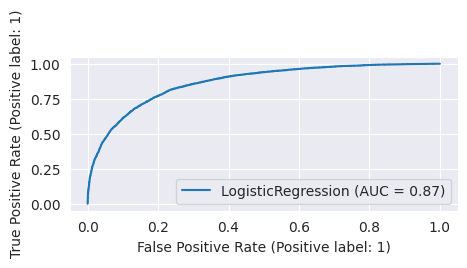

In [49]:
metrics.plot_roc_curve(logreg, inputs_test, target_test)

In [50]:
metrics.roc_auc_score(target_test, target_pred_log)

0.7857741275478463

**2. Catboost Classifier**

In [51]:
from catboost import CatBoostClassifier

In [52]:
cat = CatBoostClassifier(iterations = 1000)
cat.fit(inputs_train_resample, target_train_resample)

Learning rate set to 0.093565
0:	learn: 0.6479078	total: 60.9ms	remaining: 1m
1:	learn: 0.6114427	total: 74.2ms	remaining: 37s
2:	learn: 0.5825068	total: 86.9ms	remaining: 28.9s
3:	learn: 0.5575896	total: 99.5ms	remaining: 24.8s
4:	learn: 0.5370986	total: 111ms	remaining: 22.1s
5:	learn: 0.5204593	total: 122ms	remaining: 20.3s
6:	learn: 0.5061395	total: 133ms	remaining: 18.9s
7:	learn: 0.4933298	total: 144ms	remaining: 17.9s
8:	learn: 0.4791025	total: 156ms	remaining: 17.2s
9:	learn: 0.4672961	total: 167ms	remaining: 16.5s
10:	learn: 0.4605506	total: 178ms	remaining: 16s
11:	learn: 0.4517065	total: 188ms	remaining: 15.5s
12:	learn: 0.4436831	total: 200ms	remaining: 15.2s
13:	learn: 0.4376696	total: 210ms	remaining: 14.8s
14:	learn: 0.4335234	total: 219ms	remaining: 14.4s
15:	learn: 0.4272964	total: 230ms	remaining: 14.1s
16:	learn: 0.4197605	total: 239ms	remaining: 13.8s
17:	learn: 0.4120364	total: 250ms	remaining: 13.7s
18:	learn: 0.4061693	total: 261ms	remaining: 13.5s
19:	learn: 0.4

In [53]:
target_pred_cat = cat.predict(inputs_test)  

In [54]:
accuracy_score(target_test, target_pred_cat)

0.864052844662263

In [55]:
confusion_matrix(target_test, target_pred_cat, normalize = 'true')

array([[0.94679636, 0.05320364],
       [0.42533142, 0.57466858]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


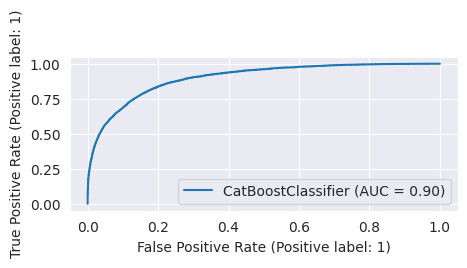

In [56]:
metrics.plot_roc_curve(cat, inputs_test, target_test)

In [57]:
metrics.roc_auc_score(target_test, target_pred_cat)

0.7607324740461173

**3. XGBoost Classifier**  

In [58]:
from xgboost import XGBClassifier

In [59]:
xgb = XGBClassifier()
xgb.fit(inputs_train_resample, target_train_resample)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [60]:
target_pred_xgb = xgb.predict(inputs_test)

In [61]:
accuracy_score(target_test, target_pred_xgb)

0.8594360394914412

In [62]:
confusion_matrix(target_test, target_pred_xgb, normalize = 'true')

array([[0.94232087, 0.05767913],
       [0.43044242, 0.56955758]])

/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


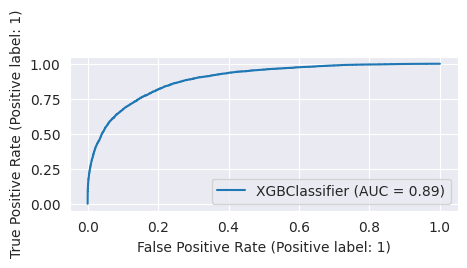

In [63]:
metrics.plot_roc_curve(xgb, inputs_test, target_test)

In [64]:
metrics.roc_auc_score(target_test , target_pred_xgb)

0.7559392222667964

#### Comparing Different models based on their accuracy

In [66]:
logreg_accuracy = accuracy_score(target_test, target_pred_log)
xgb_accuracy = accuracy_score(target_test, target_pred_xgb)
catb_accuracy = accuracy_score(target_test, target_pred_cat)

In [67]:
print("Accuracy of Logistic Regression Model {}".format(logreg_accuracy))
print("Accuracy of XGBoost Classifier Model {}".format(xgb_accuracy))
print("Accuracy of CatBoost Classifier Model {}".format(catb_accuracy))

Accuracy of Logistic Regression Model 0.7910718090773492
Accuracy of XGBoost Classifier Model 0.8594360394914412
Accuracy of CatBoost Classifier Model 0.864052844662263


Based on the above absorvation we came to a conclusion that ,among all other models `Catboost Classifier Model` gives us more accurate results, Although `XGB Model` also gives very close accuracy. 

#### Pickling the Model file for deployment

In [68]:
# Catboost Classifier Model

import pickle
filename = 'RainCatb_model.pkl'
pickle.dump(cat, open(filename, 'wb'))

In [69]:
# XGBoost Model

import pickle
filename = 'RainXgb_model.pkl'
pickle.dump(xgb, open(filename, 'wb'))